In [20]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

# importing dataset


In [21]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANELS = 3

In [22]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
 "PlantVillage",
 shuffle = True,
 image_size = (IMAGE_SIZE,IMAGE_SIZE),
 batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [23]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [24]:
len(dataset)

68

# Dataset 

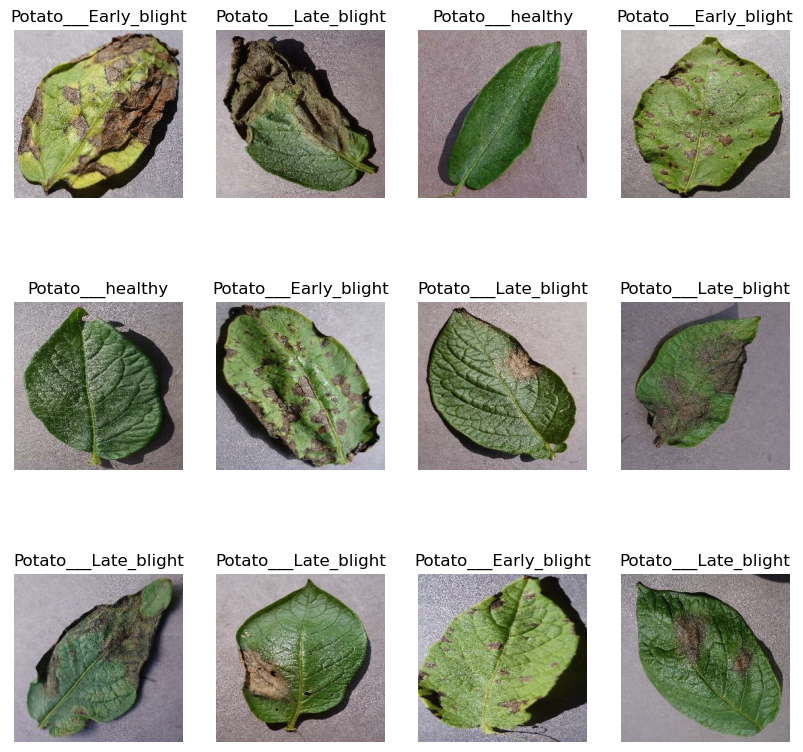

In [34]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

# split dataset in to train ,test and validation

In [26]:
def get_train_test_dataset(ds , test_size = 0.1 , train_size = 0.8 , val_size = 0.1):
    train_ds = ds.take(int(len(ds)*train_size))
    val_ds = ds.skip(int(len(ds)*train_size)).take(int(len(ds)*val_size))
    test_ds =ds.skip(int(len(ds)*train_size)).skip(int(len(ds)*val_size))
    
    return train_ds , val_ds ,test_ds


In [27]:
train_ds , val_ds, test_ds = get_train_test_dataset(dataset)

In [28]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

# Adding layers to the CNN

In [29]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [30]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANELS)
model=models.Sequential()

model.add(resize_and_rescale)
model.add(data_augmentation)
model.add(layers.Conv2D(32,(3,3),activation = "relu", input_shape = input_shape))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = "relu"))
model.add(layers.Dense(3,activation = "softmax"))
model.build(input_shape)

In [31]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [32]:
model.compile(
  optimizer="adam",
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy']
)

# Training the CNN model

In [1]:
EPOCHS = 20
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

NameError: name 'model' is not defined

# Testing our model on Test dataset

In [35]:
scores = model.evaluate(test_ds)

54/54 [==============================] - 52s 955ms/step - loss: 0.0828 - accuracy: 0.9676


In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
acc=history.history['accuracy']
loss=history.history['loss']
val_accuracy=history.history['val_accuracy']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and validation Accuracy')

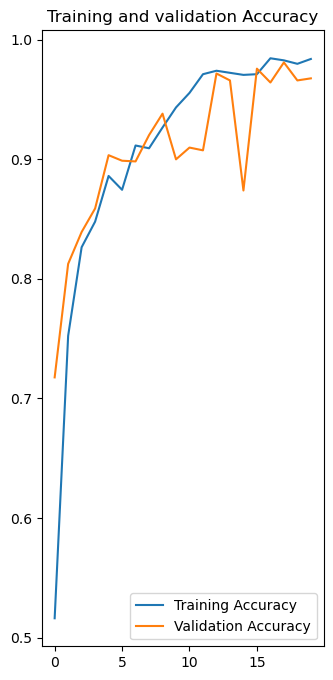

In [38]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation Accuracy')

In [40]:
tf.keras.models.save_model(model , "plant_disease_prediction.h")

C:\Users\HP\AppData\Local\Temp\ipykernel_2252\3705602723.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model , "plant_disease_prediction.hdf5")
